In [1]:
#stolen from Noah's main

import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=np.array([
[0.86,2.49],
 [ 0.09,0.83],
 [ -0.85,-0.25],
 [ 0.87,3.10],
 [ -0.44,0.87],
 [ -0.43,0.02],
 [ -1.1,-0.12],
 [ 0.40,1.81],
 [ -0.96,-0.83],
 [ 0.17,0.43]])

Y=data[:,1]

X=np.array([np.ones(Y.shape),data[:,0]])
X=np.transpose(X)
Y=np.array([Y]).T
X.shape

(10, 2)

In [3]:
def lin_reg_exact(X, Y):
    """Computes the optimal weights for linear regression.
        Returns weights vector w, N by P, where N number features, P number variables to predict
        X: M by N matrix where M is number data points
        Y: M by P matrix"""

    XtX=np.matmul(np.transpose(X),X)
    w=np.matmul(np.linalg.inv(XtX),np.transpose(X))
    w=np.matmul(w, Y)
    return w

w_exact=lin_reg_exact(X,Y)
    
    
print(w_exact)

[[1.05881341]
 [1.61016842]]


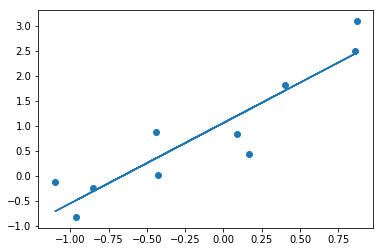

In [4]:
w=w_exact
plt.figure()
plt.scatter(X[:,1],Y)
plt.plot(X[:,1], np.matmul(X,w))

In [5]:
X.shape[1]

2

In [6]:
def lin_reg_gradient_descent(X,Y,step_size, max_iter):
    XtX=self.XtX
    w=np.random.rand(self.X.shape[1],self.Y.shape[1])
    max_iter=20

    grad_norms=np.ones([max_iter+1,1])
    
    for iter in range(max_iter):
        w=w-step_size(iter+1)*grad_e(w, XtX)
        #print(w)
        grad_norms[iter+1]=np.linalg.norm(grad_e(w,XtX))
        
    return w, grad_norms

#step_size=lambda k: 1/k**2
#max_iter=20
#w, grad_norms=lin_reg_gradient_descent(X, Y, step_size, max_iter)
class LinearRegression:
    
    """LinearRegression object. 
    Attributes:
        X: Input data. M by N numpy array. M is number of data points, N number features
        Y: Output data. M by P numpy array. M number data points, P number of variables to predict. 
        XtX: X transpose times X. Expensive to compute. Computed once on initialization, then reused.  
    Notes: Y has to have two dimensions for the matrix multiplications to work. 
                So, e.g. not (10,) but rather need (10,1)
    """
    def __init__(self, X, Y):
        self.XtX=np.matmul(np.transpose(X),X)
        self.X=X;
        self.Y=Y;
    def grad_e(self, w):
        """Gradient of weights with respect to error. Returns N by 1 column matrix."""
        return 2*(np.matmul(self.XtX, w)-np.matmul(np.transpose(self.X),self.Y))
    def exact_solution(self):
        """Computes the optimal weights for linear regression.
            Returns weights vector w, N by P, where N number features, P number variables to predict
            X: M by N matrix where M is number data points
            Y: M by P matrix"""
        w=np.matmul(np.linalg.inv(self.XtX),np.transpose(self.X))
        w=np.matmul(w, self.Y)
        return w
    def gradient_descent(self, step_size, tol, max_iter):
        """ Gradient descent, takes step_size (a function! that returns step size vs iteration)
        and the maximum number of iterations."""
        conv_flag=0
        w=np.random.rand(self.X.shape[1],self.Y.shape[1])
        grad_norms=np.ones([max_iter+1,1])
        for iter in range(max_iter):
            temp=w;
            w=w-step_size(iter+1)*self.grad_e(w)
            grad_norms[iter+1]=np.linalg.norm(self.grad_e(w))
            if np.linalg.norm(w-temp)<tol:
                conv_flag=1
                break
            
        return w, grad_norms, conv_flag
    

myLinReg=LinearRegression(X, Y)
w=myLinReg.exact_solution()

step_size=lambda k: 1/k**2
max_iter=10
tol=0.01

w, grad_norms, conv_flag=myLinReg.gradient_descent(step_size, 0.01, max_iter)


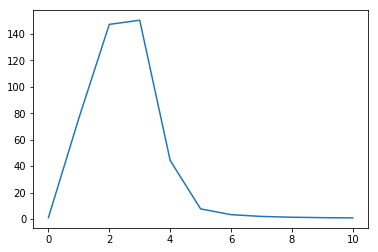

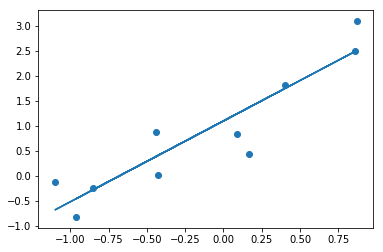

In [7]:
plt.figure()
plt.plot(grad_norms)

plt.figure()
plt.scatter(X[:,1],Y)
plt.plot(X[:,1], np.matmul(X,w))